# A CORRIGER

### 2.3 Support Vector Machine Regression

In [ ]:
from sklearn.svm import SVR
import scipy.stats as st

target = 'SEU'
outlier_filt_strat = 'LOFOutlier'
X_tr, X_te, y_tr, y_te = \
     tr_te_split_with_outliers_filter(df_X, df_y, df_outliers, # df_outliers is calculated in §1.3
                                      target, outlier_filt_strat, group_col) # 'ZscoreOutlier', 'LOFOutlier', 'IsolFOutlier'
skf = list(StratifiedKFold(3).split(X_tr, X_tr[group_col]))

reg = SVR()
name_reg = 'lo_SVR_lin_e_c_grid'
# del dict_models[name_reg] # to overwrite an existing model
param_grid={'preproc__cust_trans__strat_binary': ['ord'],
            'preproc__cust_trans__strat_low_card': ['loo'], # 'ohe', 'bin', 'ord', 'hash', 'loo'
            'preproc__cust_trans__strat_high_card': ['loo'], # 'ohe', 'bin', 'ord', 'hash', 'loo'
            'preproc__cust_trans__strat_quant': ['stand'], # 'stand', 'minmax', 'maxabs', 'robust', 'norm', 'quant_uni', 'quant_norm', 'boxcox', 'yeo'
            name_reg+'__kernel': ['linear'], # kernel  ('linear' 'rbf', 'poly')
            name_reg+'__gamma': ['auto'], # np.logspace(-8,0,9), # kernel coef
            name_reg+'__epsilon': np.logspace(-4,0,3),# st.loguniform(1e-4,1e0),#  # accepted error
            name_reg+'__C':  np.logspace(-7,7,3)}

search_strat = 'grid'
n_iter=None
refit_score='r2'

preproc_pipe = Pipeline([('cust_trans', CustTransformer(thresh_card=12))])
pipe = Pipeline([('preproc', preproc_pipe),
	             (name_reg, reg)])
dict_scv_params, models_file_name, l_curves_file_name, perm_imp_file_name = \
        set_dict_scv_params(X_tr, y_tr, target, log_on=False, refit=refit_score)

df_res = run_optimization(name_reg, reg, param_grid, models_file_name, dict_models,
                          pipe, dict_scv_params, skf, df_res, search_strat, n_iter)

-----Model not existing - computing...
Grid
Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
speak('youpi the SVR cé fini')

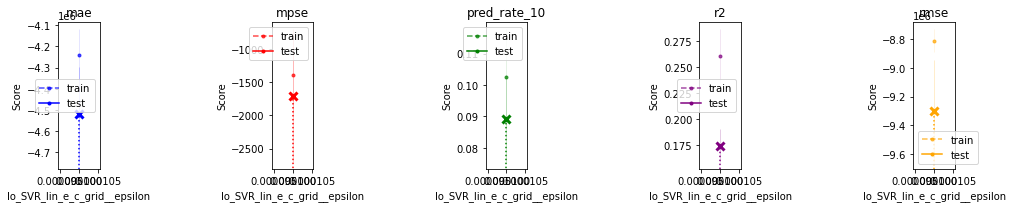

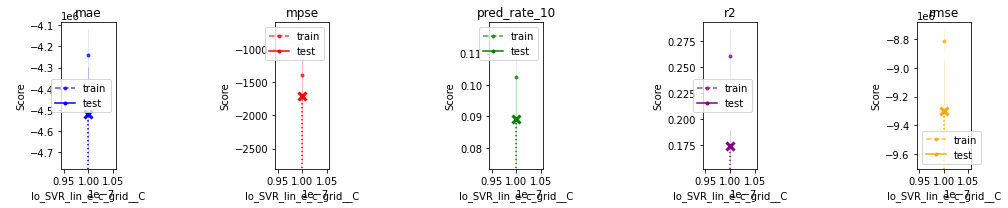

In [ ]:
# Multiscoring with hyperparameter tuning
scv = dict_models[name_reg] 
plot_scv_multi_scores(name_reg, scv, param = name_reg+'__epsilon',
                      title = None, figsize = (15, 3))
plot_scv_multi_scores(name_reg, scv, param = name_reg+'__C',
                      title = None, figsize = (15, 3))

In [ ]:
from sklearn.svm import SVR
import scipy.stats as st

reg = SVR()
name_reg = 'SVR_log_lin_e_c_grid'
# del dict_models[name_reg] # to overwrite an existing model
param_grid={'preproc__cust_trans__strat_binary': ['ord'],
            'preproc__cust_trans__strat_low_card': ['bin', 'ord','loo'], # 'ohe', 'bin', 'ord', 'hash', 'loo'
            'preproc__cust_trans__strat_high_card': ['ord', 'loo'], # 'ohe', 'bin', 'ord', 'hash', 'loo'
            'preproc__cust_trans__strat_quant': ['stand', 'robust', 'quant_norm', 'none', 'boxcox'], # 'stand', 'minmax', 'maxabs', 'robust', 'norm', 'quant_uni', 'quant_norm', 'pow'
            name_reg+'__kernel': ['linear'], # kernel coef (radial basis function 'rbf', 'poly')
            name_reg+'__gamma': ['auto'], # np.logspace(-8,0,9), # kernel coef (radial basis function 'rbf')
            name_reg+'__epsilon': np.logspace(-4,0,10), #st.loguniform(1e-4,1e0), # accepted error
            name_reg+'__C': np.logspace(-5,3,10)} #  np.logspace(-7,7,20)
search_strat = 'grid'
n_iter=None
refit_score='r2'

preproc_pipe = Pipeline([('cust_trans', CustTransformer(thresh_card=12))])
pipe = Pipeline([('preproc', preproc_pipe),
	             (name_reg, reg)])
dict_scv_params, models_file_name, l_curves_file_name, perm_imp_file_name = \
        set_dict_scv_params(X_tr, y_tr, target, log_on=True, refit=refit_score)

df_res = run_optimization(name_reg, reg, param_grid, models_file_name, dict_models,
                          pipe, dict_scv_params, skf, df_res, search_strat, n_iter)

In [ ]:
from sklearn.svm import SVR
import scipy.stats as st

reg = SVR()
name_reg = 'SVR_log_poly_e_c_grid'
# del dict_models[name_reg] # to overwrite an existing model
param_grid={'preproc__cust_trans__strat_binary': ['ord'],
            'preproc__cust_trans__strat_low_card': ['bin', 'ord','loo'], # 'ohe', 'bin', 'ord', 'hash', 'loo'
            'preproc__cust_trans__strat_high_card': ['ord', 'loo'], # 'ohe', 'bin', 'ord', 'hash', 'loo'
            'preproc__cust_trans__strat_quant': ['stand', 'robust', 'quant_norm', 'none', 'boxcox'], # 'stand', 'minmax', 'maxabs', 'robust', 'norm', 'quant_uni', 'quant_norm', 'pow'
            name_reg+'__kernel': ['linear'], # kernel coef (radial basis function 'rbf', 'poly')
            name_reg+'__gamma': ['auto'], # np.logspace(-8,0,9), # kernel coef (radial basis function 'rbf')
            name_reg+'__epsilon': np.logspace(-4,0,10), #st.loguniform(1e-4,1e0), # accepted error
            name_reg+'__C': np.logspace(-5,3,10)} #  np.logspace(-7,7,20)
search_strat = 'grid'
n_iter=None
refit_score='r2'

preproc_pipe = Pipeline([('cust_trans', CustTransformer(thresh_card=12))])
pipe = Pipeline([('preproc', preproc_pipe),
	             (name_reg, reg)])
dict_scv_params, models_file_name, l_curves_file_name, perm_imp_file_name = \
        set_dict_scv_params(X_tr, y_tr, target, log_on=True, refit=refit_score)

df_res = run_optimization(name_reg, reg, param_grid, models_file_name, dict_models,
                          pipe, dict_scv_params, skf, df_res, search_strat, n_iter)

In [ ]:
from sklearn.svm import SVR
import scipy.stats as st

reg = SVR()
name_reg = 'SVR_log_rbf_e_c_grid'
# del dict_models[name_reg] # to overwrite an existing model
param_grid={'preproc__cust_trans__strat_binary': ['ord'],
            'preproc__cust_trans__strat_low_card': ['bin', 'ord','loo'], # 'ohe', 'bin', 'ord', 'hash', 'loo'
            'preproc__cust_trans__strat_high_card': ['ord', 'loo'], # 'ohe', 'bin', 'ord', 'hash', 'loo'
            'preproc__cust_trans__strat_quant': ['stand', 'robust', 'quant_norm', 'none', 'boxcox'], # 'stand', 'minmax', 'maxabs', 'robust', 'norm', 'quant_uni', 'quant_norm', 'pow'
            name_reg+'__kernel': ['linear'], # kernel coef (radial basis function 'rbf', 'poly')
            name_reg+'__gamma': ['auto'], # np.logspace(-8,0,9), # kernel coef (radial basis function 'rbf')
            name_reg+'__epsilon': np.logspace(-4,0,10), #st.loguniform(1e-4,1e0), # accepted error
            name_reg+'__C': np.logspace(-5,3,10)} #  np.logspace(-7,7,20)
search_strat = 'grid'
n_iter=None
refit_score='r2'

preproc_pipe = Pipeline([('cust_trans', CustTransformer(thresh_card=12))])
pipe = Pipeline([('preproc', preproc_pipe),
	             (name_reg, reg)])
dict_scv_params, models_file_name, l_curves_file_name, perm_imp_file_name = \
        set_dict_scv_params(X_tr, y_tr, target, log_on=True, refit=refit_score)

df_res = run_optimization(name_reg, reg, param_grid, models_file_name, dict_models,
                          pipe, dict_scv_params, skf, df_res, search_strat, n_iter)

In [ ]:
speak("linear regressions done")

### 2.3 Lasso

In [ ]:
from sklearn.linear_model import Lasso

reg = Lasso()
name_reg = 'Lasso_rand'
param_grid={'preproc__strat_binary': ['ord'],
            'preproc__strat_low_card': ['ohe', 'bin'], # 'ohe', 'bin', 'ord', 'hash', 'loo'
            'preproc__strat_high_card': ['bin', 'ord', 'hash', 'loo'], # 'ohe', 'bin', 'ord', 'hash', 'loo'
            'preproc__strat_quant': ['stand'], # 'stand', 'minmax', 'maxabs', 'robust', 'norm', 'quant_uni', 'quant_norm', 'pow'
            name_reg+'__alpha': st.loguniform(1e-7, 1e7)} # np.logspace(-7,7,20)


### 2.4 ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet

reg = ElasticNet()
name_reg = 'ElasticNet_rand'
param_grid={'preproc__strat_binary': ['ord'],
            'preproc__strat_low_card': ['ohe', 'bin'], # 'ohe', 'bin', 'ord', 'hash', 'loo'
            'preproc__strat_high_card': ['ord', 'hash', 'loo'], # 'ohe', 'bin', 'ord', 'hash', 'loo'
            'preproc__strat_quant': ['stand'], # 'stand', 'minmax', 'maxabs', 'robust', 'norm', 'quant_uni', 'quant_norm', 'pow'
            name_reg+'__alpha': st.loguniform(1e-7, 1e7), # np.logspace(-7,7,20)
            name_reg+'__l1_ratio': st.uniform(0,1), # [0,0.15,0.3,0.45,0.6,0.75,1]
            name_reg+'__tol' : st.loguniform(1e-3, 1e0)} #np.logspace(-4,0,5)}


### 2.6 Support Vector Machine Regression

In [ ]:
from sklearn.svm import SVR
import scipy.stats as st

reg = SVR()
name_reg = 'SVR_grid'
param_grid={'preproc__strat_binary': ['ord'],
            'preproc__strat_low_card': ['ohe'], # 'ohe', 'bin', 'ord', 'hash', 'loo'
            'preproc__strat_high_card': ['ord', 'loo'], # 'ohe', 'bin', 'ord', 'hash', 'loo'
            'preproc__strat_quant': ['stand'], # 'stand', 'minmax', 'maxabs', 'robust', 'norm', 'quant_uni', 'quant_norm', 'pow'
            name_reg+'__kernel': ['rbf', 'linear', 'poly'], # kernel coef (radial basis function 'rbf')
            name_reg+'__gamma': ['auto'], # np.logspace(-8,0,9), # kernel coef (radial basis function 'rbf')
            name_reg+'__epsilon': np.logspace(-3,0,5), # accepted error
            name_reg+'__C': np.logspace(-2,2,5)} # regularization coef
search_strat = 'grid'


### 2.5 Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()
name_reg = 'RandomForest_grid'
param_grid={'preproc__strat_binary': ['ord'],
            'preproc__strat_low_card': ['ohe', 'bin', 'hash'], # 'ohe', 'bin', 'ord', 'hash', 'loo'
            'preproc__strat_high_card': ['ord', 'hash', 'loo'], # 'ohe', 'bin', 'ord', 'hash', 'loo'
            'preproc__strat_quant': ['stand'], # 'stand', 'minmax', 'maxabs', 'robust', 'norm', 'quant_uni', 'quant_norm', 'pow'
            name_reg+'__n_estimators': [100,200,500],#,200,500,1000], # nb leaves
            name_reg+'__min_samples_leaf': [1,2,5,10], # mean nb leaves in a node
            name_reg+'__max_features': ['auto', 'sqrt']}#, 'sqrt']} # 'auto', 'sqrt' (nb features in a tree)


### Stochastic Gradient Descent

In [ ]:
from sklearn.linear_model import SGDRegressor

loss='squared_loss', # OK default
penalty='l2', alpha=0.0001, l1_ratio=0.15,
fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0,
epsilon=0.1, random_state=None, learning_rate='invscaling', eta0=0.01,
power_t=0.25, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5,
warm_start=False, average=False

reg = SGDRegressor()
name_reg = 'lo_SGDreg_enc_grid'
param_grid={'preproc__strat_binary': ['ord'],
            'preproc__strat_low_card': ['ohe', 'bin', 'hash'], # 'ohe', 'bin', 'ord', 'hash', 'loo'
            'preproc__strat_high_card': ['ord', 'hash', 'loo'], # 'ohe', 'bin', 'ord', 'hash', 'loo'
            'preproc__strat_quant': ['stand'], # 'stand', 'minmax', 'maxabs', 'robust', 'norm', 'quant_uni', 'quant_norm', 'pow'
            name_reg+'': [100,200,500],#,200,500,1000], # nb leaves
            name_reg+'': [1,2,5,10], # mean nb leaves in a node
            name_reg+'': ['auto', 'sqrt']}#, 'sqrt']} # 'auto', 'sqrt' (nb features in a tree)


### 2.7 XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor

reg = XGBRegressor(objective ='reg:squarederror')# 'reg:lineaqr' deprecated
name_reg = 'XGBR_grid'
param_grid={'preproc__strat_binary': ['ord'],
            'preproc__strat_low_card': ['ohe', 'bin', 'hash'], # 'ohe', 'bin', 'ord', 'hash', 'loo'
            'preproc__strat_high_card': ['ord', 'hash', 'loo'], # 'ohe', 'bin', 'ord', 'hash', 'loo'
            'preproc__strat_quant': ['stand'], # 'stand', 'minmax', 'maxabs', 'robust', 'norm', 'quant_uni', 'quant_norm', 'pow'
            name_reg+'__learning_rate': np.logspace(-3,-1,3),
            name_reg+'__n_estimators': [1000,2000], # [100,200,500,1000,2000]
            name_reg+'__max_depth': [3,4],
            name_reg+'__subsample': [0.8,1],
            name_reg+'__colsample_bytree': [0.3,0.8,1], # [0.3,0.5,0.8,0.9,1]
            name_reg+'__gamma': [1]}


# P4_functions - OLD VERSIONS 

In [ ]:
## OLD VERSIONS

In [ ]:
def scores_reg(name, X, y, ypr, exclude=['Adj_R2']):

    MAE = metrics.mean_absolute_error(y, ypr)
    MSE = metrics.mean_squared_error(y, ypr)
    RMSE = np.sqrt(MSE)
    R2 = metrics.r2_score(y, ypr)
    n = y.shape[0] # nb of observations
    p = X.shape[1] # nb of indep features
    Adj_R2 = 1-(1-R2)*(n-1)/(n-p-1)
    MAPE = 100*np.mean(np.abs((y-ypr)/(y+1e-10)))
    MSPE = 100*np.mean(np.square((y-ypr)/y+1e-10))
    expl_var = metrics.explained_variance_score(y, ypr)

    dict_metrics = {'MAE': MAE, 'MSE': MSE, 'RMSE': RMSE,
                    'R2': R2, 'expl_var': expl_var, 'Adj_R2': Adj_R2,
                    'MAPE': MAPE, 'MSPE': MSPE}
    
    li_n_metrics = [n for n in dict_metrics.keys() if n not in exclude]
    li_metrics = [dict_metrics[n] for n in li_n_metrics]
    ser = pd.Series(li_metrics, index = li_n_metrics, name=name)

    return ser

In [ ]:
def cv_scores_reg(name, pipe, X, y, cv=5, adj_r2=False):
    res = pd.Series()
    cv_scoring = ['neg_root_mean_squared_error', 'r2']

    cv_scores = cross_validate(pipe, X, y, scoring=cv_scoring,                       
                               cv=cv, return_train_score=True, verbose=1)
    n = y.shape[0]/cv # n: nb of observations
    p = X.shape[1] # p: nb of indep features
    Adj_R2 = (1-(1-cv_scores['test_r2'])*(n-1)/(n-p-1)).mean()
    if adj_r2:
        res = pd.Series({'mean_CV_te_RMSE': -cv_scores['test_neg_root_mean_squared_error'].mean(),
	                     'mean_CV_te_R2': cv_scores['test_r2'].mean(),
	                     'mean_CV_te_adjR2': Adj_R2},
                         name = name)
    else:
        res = pd.Series({'mean_CV_te_RMSE': -cv_scores['test_neg_root_mean_squared_error'],
	                     'mean_CV_te_R2': cv_scores['test_r2']}, name = name)
    return res

In [ ]:
def get_append_scores(name_reg, pipe, Xte, yte, df_res=None, cv=6):
    if df_res is None:
        df_res = pd.DataFrame(dtype = 'object')
    df_res_mod = pd.DataFrame(dtype = 'object')
    ypr = pipe.predict(Xte)
    ser = scores_reg(name_reg, Xte, yte, ypr).astype('object')
    ser = ser.append(cv_scores_reg(name_reg, pipe, Xte, yte, cv=cv).astype('object'))
    df_res_mod = pd.concat([df_res,ser.to_frame()],1)
    return df_res_mod

In [ ]:
def scv_perf_fetcher(name_reg, scv,
                     cv_results=True,
                     Xte=None, yte=None,
                     test_set=False,  exclude=['Adj_R2'],
                     cross_val=False, cv_test=6):
    
    df_res = pd.DataFrame(dtype = 'object')
    # 1 | best hyperparams and scores obtained during searchCV (training, testing)
    if cv_results:
        df_best_res = pd.DataFrame(scv.cv_results_).loc[scv.best_index_].astype('object')
        df_res.at['best_params', name_reg] = str(df_best_res['params'])
        li_index = df_best_res.index[df_best_res.index.str.startswith(('mean_', 'std_'))]
        li_index = move_cat_containing(li_index, ['train', 'test', 'score', 'fit'])
        for i in li_index:
            df_res.at[i, name_reg] = df_best_res[i]

    # 2 | score of the model with best params on test set (optional)
    if test_set:
        ypr = scv.best_estimator_.predict(Xte)
        res = scores_reg(name_reg, Xte, yte, ypr,
                        exclude=['Adj_R2']).astype('object')
        df_res = df_res.append(res.to_frame())

    # 3 | mean cv score of the model with best params on test set (optional)
    if cross_val:
        res = cv_scores_reg(name_reg, scv.best_estimator_,
                            Xte, yte, cv=cv_test).astype('object')
        df_res = df_res.append(res.to_frame())

    return df_res
